# Crude analysis of Banking, O&G and Tech & Software Markets

Observation of 2008 Financial Crash, Rise from it, 2015 events and COVID-19 Pandemic influence

### Financial Sector
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Tech
* Microsoft
* Apple

### Oil and Gas/Energy
* Schlumberger
* ExxonMobil

In [1]:
from pandas_datareader import data,wb
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2022, 1, 1)
#BANKS
BAC = data.DataReader("BAC", 'yahoo', start, end)#Bank of America
C = data.DataReader("C", 'yahoo', start, end)#Citigroup
GS = data.DataReader("GS", 'yahoo', start, end)#Goldman Sachs
JPM = data.DataReader("JPM", 'yahoo', start, end)#JP Morgan Chase
MS = data.DataReader("MS", 'yahoo', start, end)#Microsoft
WFC = data.DataReader("WFC", 'yahoo', start, end)#Wells Fargo
#O&G
XOM = data.DataReader("XOM", 'yahoo', start, end)#ExxonMobil
SLB = data.DataReader("SLB", 'yahoo', start, end)#Schlumberger
#TECH & SOFTWARE
AAPL = data.DataReader("AAPL", 'yahoo', start, end)#Apple
MSFT = data.DataReader("MSFT", 'yahoo', start, end)#Microsoft

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC','XOM','SLB', 'AAPL', 'MSFT']

In [8]:
banks = pd.concat([BAC, C, GS, JPM, MS, WFC, XOM, SLB, AAPL, MSFT],axis=1,keys=tickers)

In [10]:
banks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
banks.head(2)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.777508  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.418785  491.000000  483.500000  488.600006  483.799988  ...   

Bank Ticker      AAPL                                    MSFT                \
Stock Info       Open     Close       Volume Adj Close   High    Low   Open   
Date                                                                          
2006-01-03   2.585000  2.669643  807234400.0  2.285947  27.00  26.10  26.25   
2006-01-04   2.683214  2.677500  619603600.0  2.292675  27.08  26.77  26.77   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2006-01-03   26.840000  79973000.0  19.302160  
2006-01-04   26.969999  57975600.0  19.395649  

[2 rows x 60 columns]

In [15]:
banks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC      54.900002
C       564.099976
GS      423.850006
JPM     171.779999
MS      105.449997
WFC      65.930000
XOM     104.379997
SLB     117.949997
AAPL    180.330002
MSFT    343.109985
dtype: float64

In [42]:
returns = pd.DataFrame()
returns_banks = pd.DataFrame()
#returns[tick+'return'] = banks.xs(key='Close',axis=1,level='Stock Info')
for t in tickers:
    returns[t+' Return'] = banks[t]['Close'].pct_change()
returns.head()
#for t in tickers:
#    for i in range(1,len(banks)):
#            returns_banks[t+' Returns'] = (banks[t]['Close'][i]-banks[t]['Close'][i-1])/banks[t]['Close'][i]
#            #print(banks[t]['Close'][i])
#returns_banks.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return,XOM Return,SLB Return,AAPL Return,MSFT Return
Date,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,0.001710,0.013351,0.002943,0.004843
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,-0.004951,-0.005156,-0.007870,0.000742
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,0.019732,0.031478,0.025813,-0.002964
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,-0.000505,-0.013770,-0.003277,-0.001858


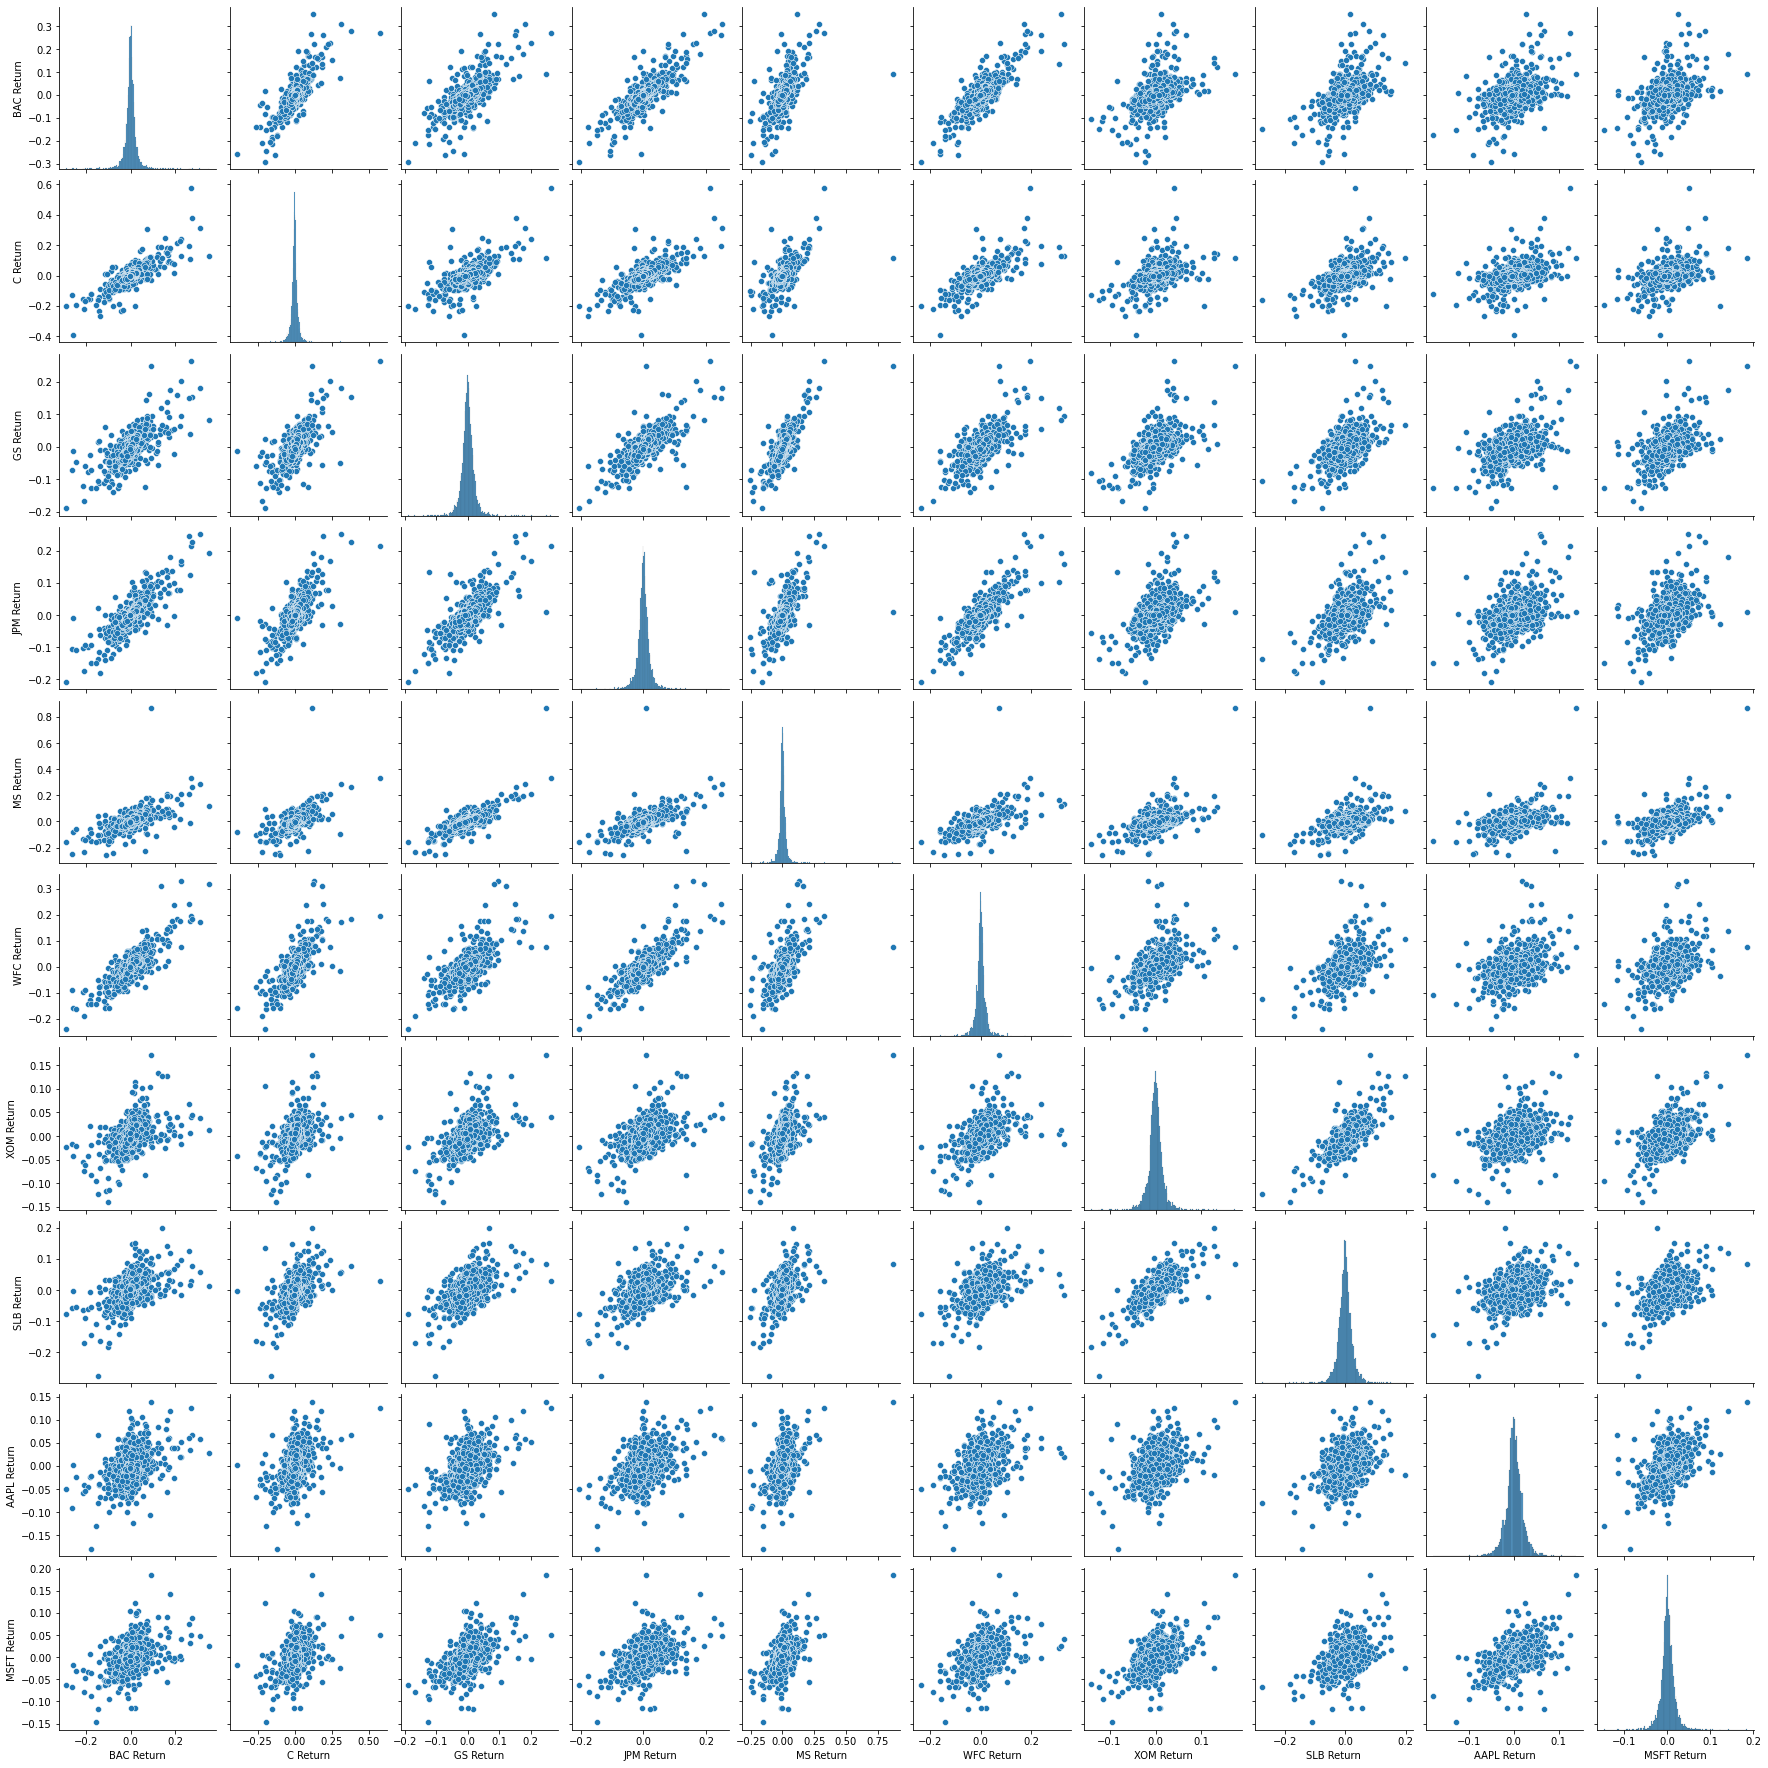

In [45]:
import seaborn as sns
sns.pairplot(returns)

In [48]:
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
XOM Return    2008-10-15
SLB Return    2020-03-09
AAPL Return   2008-09-29
MSFT Return   2020-03-16
dtype: datetime64[ns]

In [49]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
XOM Return    2008-10-13
SLB Return    2020-11-09
AAPL Return   2008-10-13
MSFT Return   2008-10-13
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [51]:
returns.std()#Citigroup is riskiest

BAC Return     0.031717
C Return       0.033556
GS Return      0.023327
JPM Return     0.024607
MS Return      0.032579
WFC Return     0.027167
XOM Return     0.016856
SLB Return     0.024747
AAPL Return    0.020495
MSFT Return    0.017432
dtype: float64

In [72]:
returns['Month'] = returns.index.month
returns['Year']= returns.index.year
returns['Month Day'] = returns.index.day
returns[returns['Year']==2015].std()
#MSFT amongst all and tech
#SLB service provider amongst oil and gas 
#Morgan Stanley amongst banks

BAC Return     0.016163
C Return       0.015289
GS Return      0.014046
JPM Return     0.014017
MS Return      0.016249
WFC Return     0.012591
XOM Return     0.014321
SLB Return     0.016267
AAPL Return    0.016841
MSFT Return    0.017801
Month          3.436303
Year           0.000000
Month Day      8.770934
dtype: float64

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, '2020')

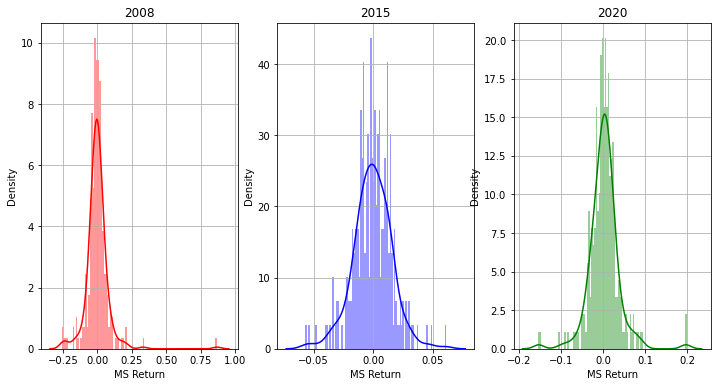

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(returns[returns['Year']==2008]['MS Return'], bins=100, color='red')
plt.grid()
plt.title('2008')

plt.subplot(1,3,2)
sns.distplot(returns[returns['Year']==2015]['MS Return'], bins=100, color='blue')
plt.grid()
plt.title('2015')

plt.subplot(1,3,3)
sns.distplot(returns[returns['Year']==2020]['MS Return'], bins=100, color='green')
plt.grid()
plt.title('2020')

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, '2020')

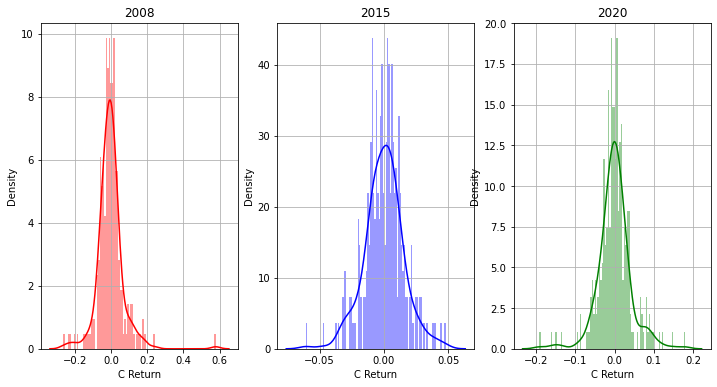

In [93]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(returns[returns['Year']==2008]['C Return'], bins=100, color='red')
plt.grid()
plt.title('2008')

plt.subplot(1,3,2)
sns.distplot(returns[returns['Year']==2015]['C Return'], bins=100, color='blue')
plt.grid()
plt.title('2015')

plt.subplot(1,3,3)
sns.distplot(returns[returns['Year']==2020]['C Return'], bins=100, color='green')
plt.grid()
plt.title('2020')

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, '2020')

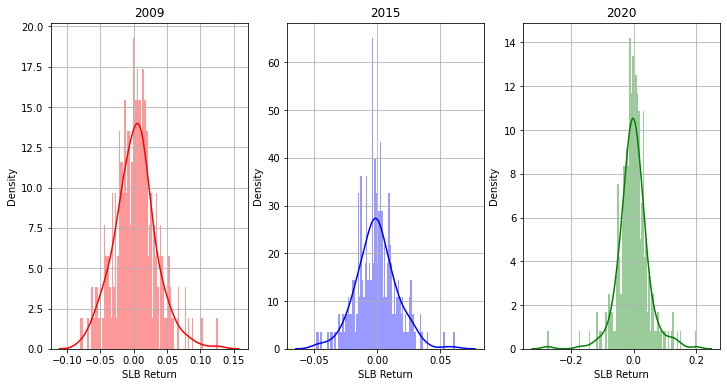

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(returns[returns['Year']==2009]['SLB Return'], bins=100, color='red')
plt.grid()
plt.title('2009')

plt.subplot(1,3,2)
sns.distplot(returns[returns['Year']==2015]['SLB Return'], bins=100, color='blue')
plt.grid()
plt.title('2015')

plt.subplot(1,3,3)
sns.distplot(returns[returns['Year']==2020]['SLB Return'], bins=100, color='green')
plt.grid()
plt.title('2020')

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 1.0, '2020')

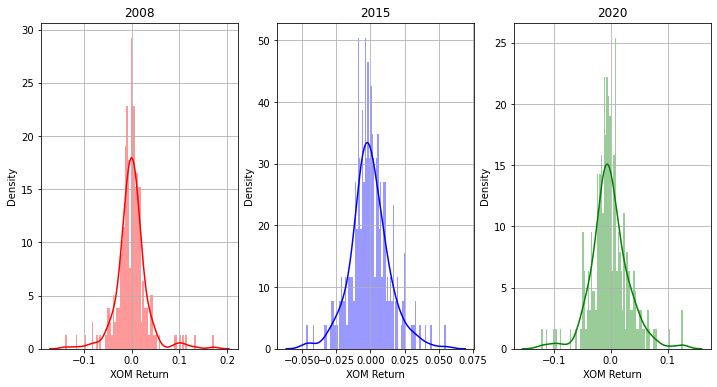

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(returns[returns['Year']==2008]['XOM Return'], bins=100, color='red')
plt.grid()
plt.title('2008')

plt.subplot(1,3,2)
sns.distplot(returns[returns['Year']==2015]['XOM Return'], bins=100, color='blue')
plt.grid()
plt.title('2015')

plt.subplot(1,3,3)
sns.distplot(returns[returns['Year']==2020]['XOM Return'], bins=100, color='green')
plt.grid()
plt.title('2020')

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



ModuleNotFoundError: No module named 'plotly'

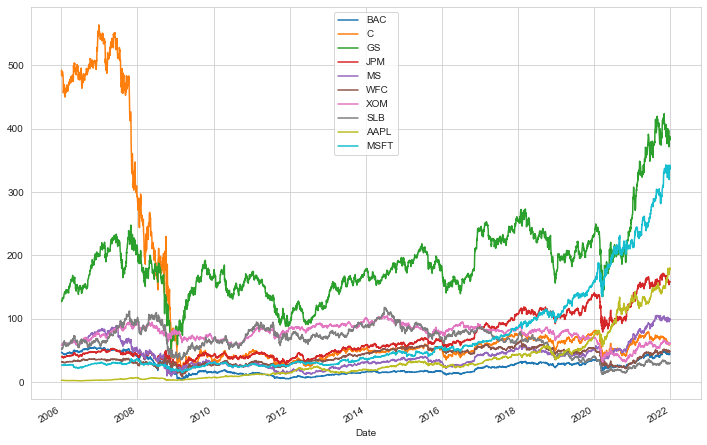

In [118]:
for t in tickers:
    banks[(t)]['Close'].plot(figsize=(12,8),label=t)
    plt.legend()
#Finacial Crash of 2008 is perceptible by the kink very closely in all stocks although tech sector seems less affected by it
# Effect of COVID is visible as a sharp fall just at the beginning of 2020
# An appreciable rise is also visible post recovery at the arrival of 2022 

Text(0.5, 1.0, 'Tech & Software')

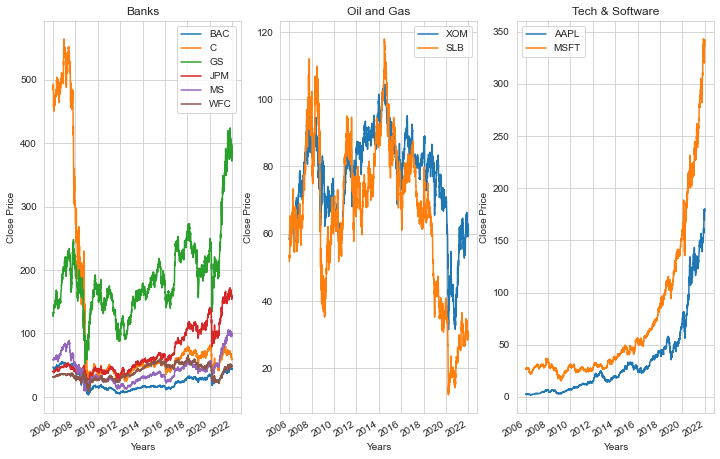

In [130]:
plt.subplot(1,3,1)
for t in tickers[0:6]:
    banks[(t)]['Close'].plot(figsize=(12,8),label=t)
    plt.legend()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Banks')

plt.subplot(1,3,2)
for t in tickers[6:8]:
    banks[(t)]['Close'].plot(figsize=(12,8),label=t)
    plt.legend()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Oil and Gas')

plt.subplot(1,3,3)
for t in tickers[8:11]:
    banks[(t)]['Close'].plot(figsize=(12,8),label=t)
    plt.legend()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Tech & Software')
#Tech and Software sector demonstrate an aggregate similarity to x^2 or x^3, almost a horizontal parabola and demonstrates the robustness of the sector
#Oil and Gas sector shows a periodic behaviour describing the vulerabilities associated 
#Finance sector registers relatively low growth post the crash and seem to show strong recovery post COVID which may be driven by low short-term bond yields, high credit creation

Text(0.5, 1.0, 'BAC Bank')

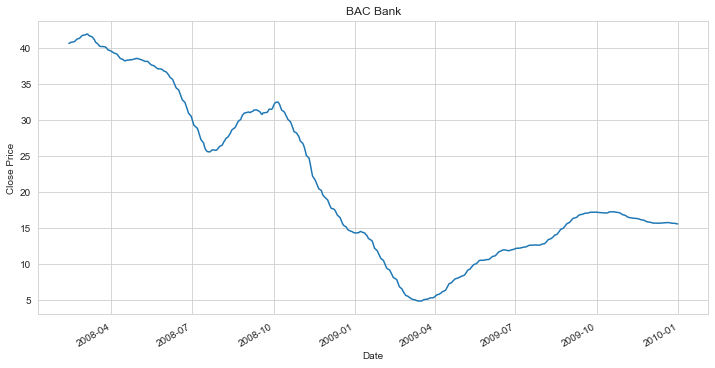

In [145]:
banks[(returns['Year']==2008)|(returns['Year']==2009)]['BAC']['Close'].rolling(window=30).mean().plot(figsize=(12,6))
plt.ylabel('Close Price')
plt.title('BAC Bank')
#Influence of financial crash on Bank of America/Finance Sector was relatively high

Text(0.5, 1.0, 'SLB O&G')

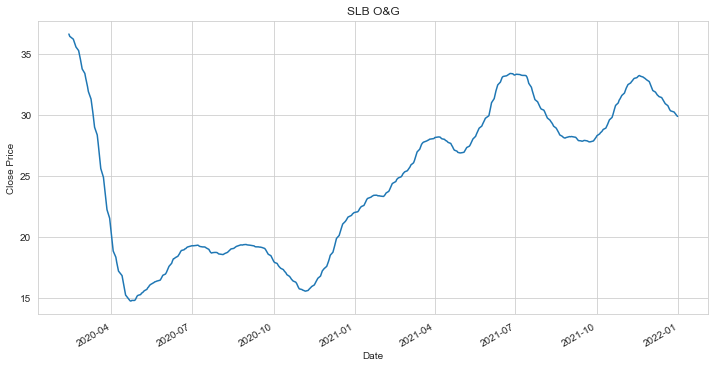

In [149]:
banks[(returns['Year']==2020)|(returns['Year']==2021)]['SLB']['Close'].rolling(window=30).mean().plot(figsize=(12,6))
plt.ylabel('Close Price')
plt.title('SLB O&G 2020-21')
#Impact of COVID-19 on oil and gas services
#COVID marked a sudden slump in value as a result of decrease in demand

Text(0.5, 1.0, 'XOM O&G')

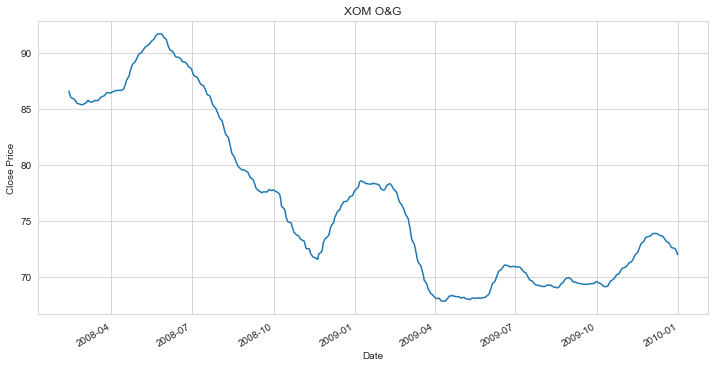

In [148]:
banks[(returns['Year']==2008)|(returns['Year']==2009)]['XOM']['Close'].rolling(window=30).mean().plot(figsize=(12,6))
plt.ylabel('Close Price')
plt.title('XOM O&G')
# ExxonMobil registered a deep slump in its share price during the 2008 Financial Crisis

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

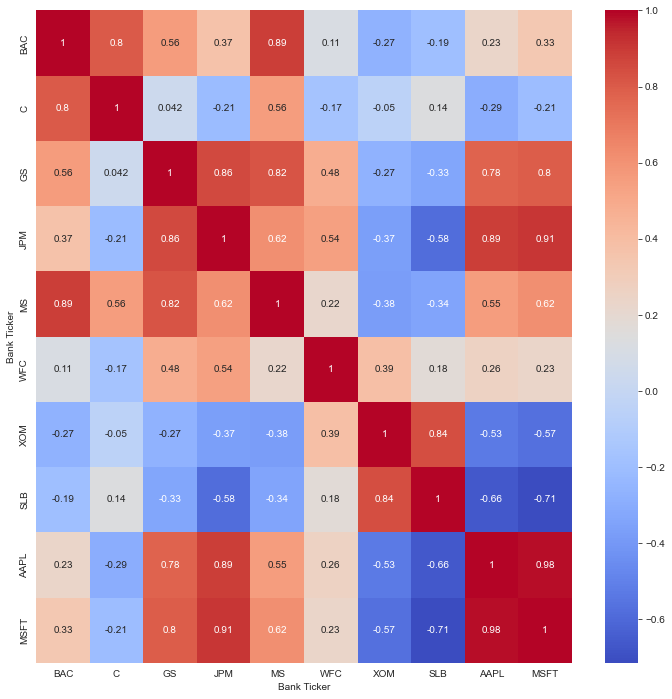

In [156]:
plt.figure(figsize=(12,12))
stocks_corr = banks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.heatmap(stocks_corr,annot=True,cmap='coolwarm')

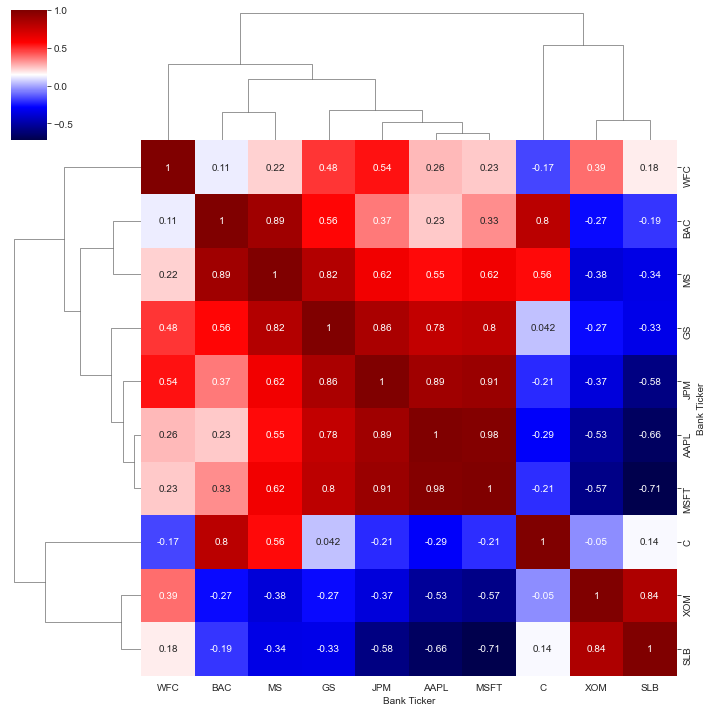

In [158]:
sns.clustermap(stocks_corr,cmap='seismic',annot=True)

In [162]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [163]:
BAC[returns['Year']==2015][['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

In [169]:
XOM[returns['Year']==2008]['Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [166]:
BAC[returns['Year']==2008]['Close'].ta_plot(study='boll')